# Series temporales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from prophet import Prophet

In [10]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [29]:
df_comp = raw_csv_data.copy()  # SE COPIA POR MANTENER LOS DATOS ORIGINALES CARA A FUTURO

In [12]:
df_comp.head() # PRECIO DE CIERRE DE LOS INDICADORES. SE TOMA LA INFORMACION POR DIA - INDICES BURSATILES

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [13]:
df_comp.isna() #comprobamos valores faltantes - missing values

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [14]:
df_comp.isna().sum() #sumamos los valores faltantes por columna

,0
date,0
spx,0
dax,0
ftse,0
nikkei,0


## Graficos basicos

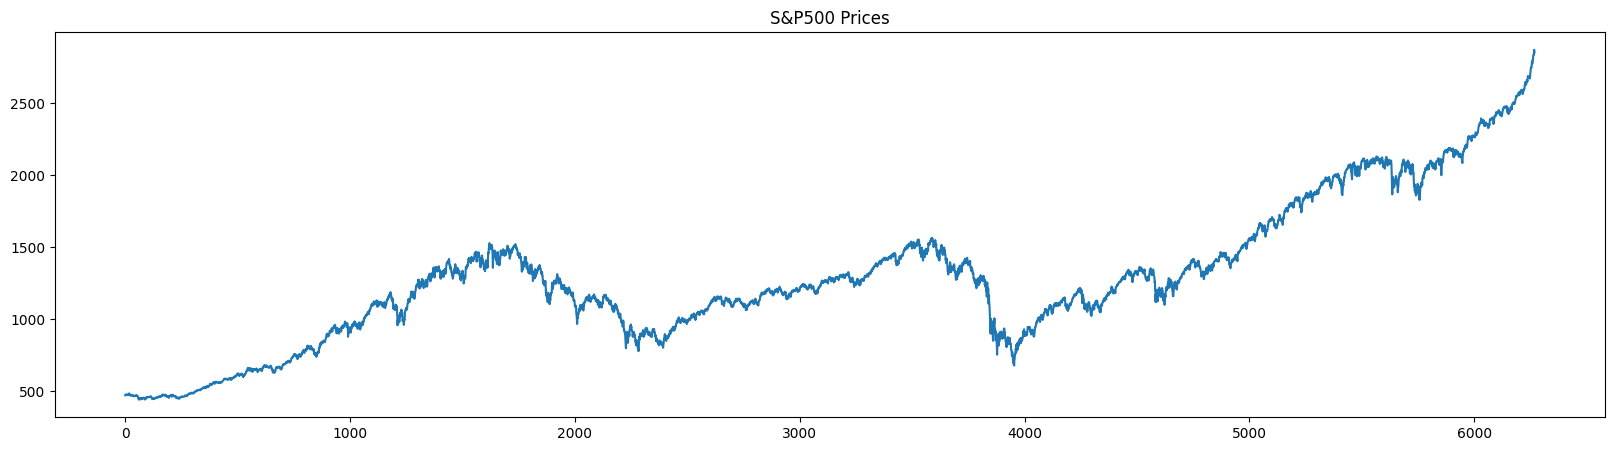

In [15]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices") #figsize = tamaño de la grafica
plt.show()

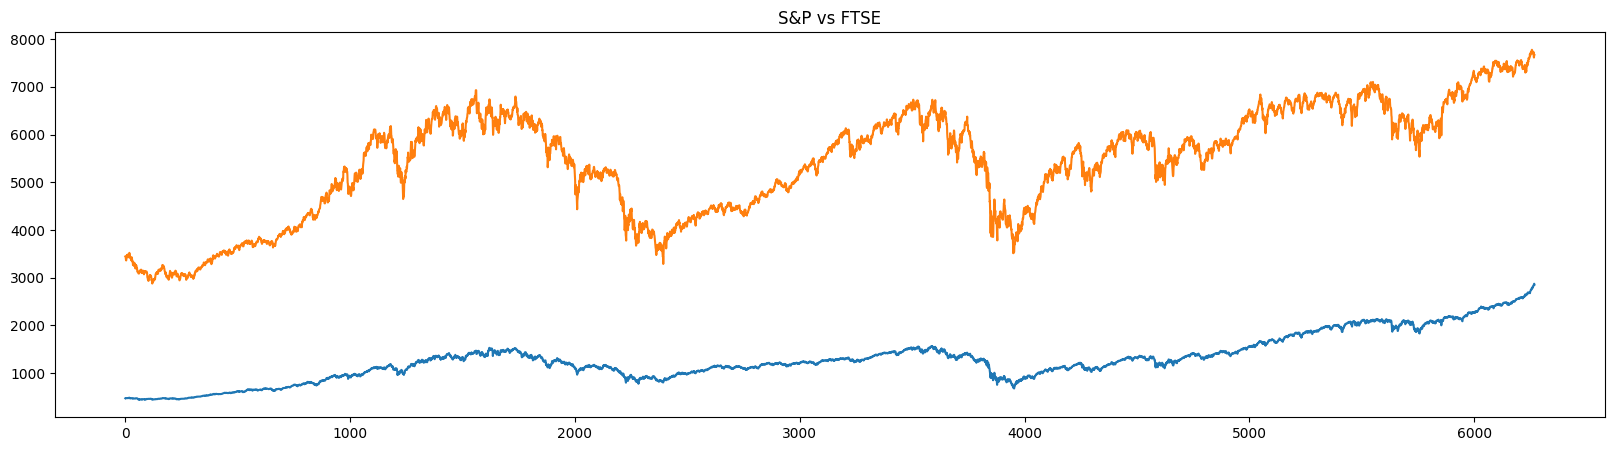

In [16]:
df_comp.spx.plot(figsize=(20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title = "FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show() #se pueden graficar varias columnas a la vez para realizar comparaciones

## Técnicas de suavizado

### SMA: Simple Moving Average - Promedio Móvil Simple

In [17]:
df_sma = pd.DataFrame()

df_sma['spx'] = df_comp['spx']
df_sma['3-month-SMA'] = df_comp['spx'].rolling(window=3).mean()
df_sma['6-month-SMA'] = df_comp['spx'].rolling(window=6).mean()
df_sma['12-month-SMA'] = df_comp['spx'].rolling(window=12).mean()

# la funcion rolling permite seleccionar la ventana temporal (window)
# luego obtenemos la media

In [18]:
df_sma.head(15)

,spx,3-month-SMA,6-month-SMA,12-month-SMA
0,469.90,NaN,NaN,NaN
1,475.27,NaN,NaN,NaN
2,474.13,473.100000,NaN,NaN
3,474.17,474.523333,NaN,NaN
4,472.47,473.590000,NaN,NaN
5,474.91,473.850000,473.475000,NaN
6,473.30,473.560000,474.041667,NaN
7,474.25,474.153333,473.871667,NaN
8,474.30,473.950000,473.900000,NaN
9,474.98,474.510000,474.035000,NaN


<Axes: >

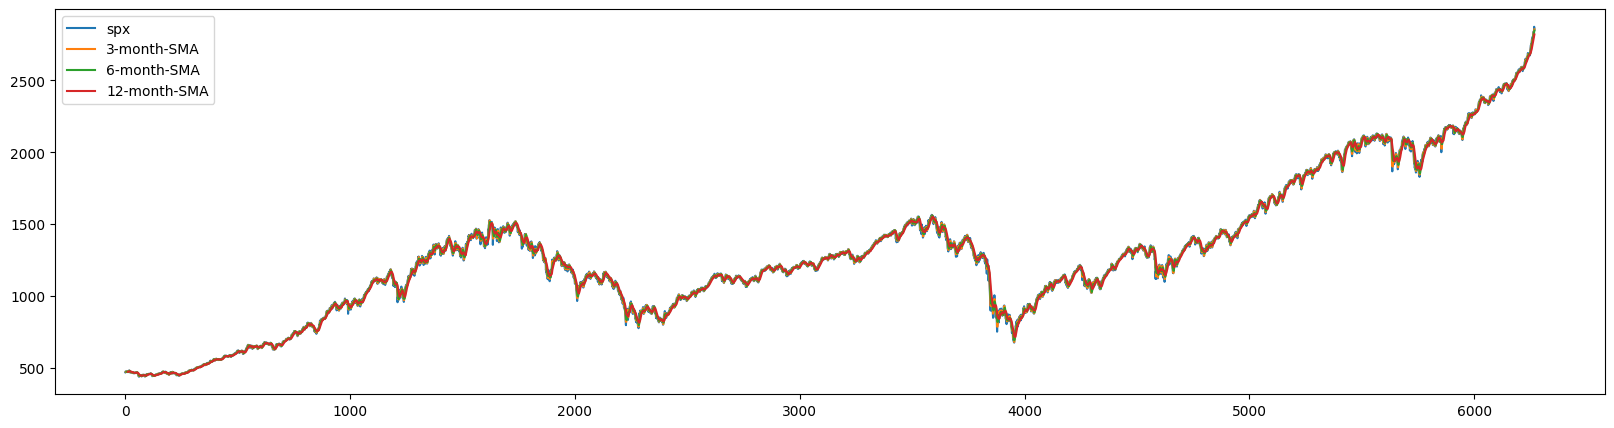

In [19]:
df_sma.plot(figsize=(20,5))

### EWMA: Exponential Weighted Moving Average - Promedio movil ponderado exponencialmente
Se tiene que pasar el valor de alfa entre 0 y 1, cuanto mas cerca de 1 menos efecto tendra, cuando mas cerca de 0 mas anulara los picos.

In [20]:
df_sma['EWMA-8'] = df_sma['spx'].ewm(alpha=0.8,adjust=True).mean()
df_sma['EWMA-5'] = df_sma['spx'].ewm(alpha=0.5,adjust=True).mean()
df_sma['EWMA-1'] = df_sma['spx'].ewm(alpha=0.1,adjust=True).mean()

In [21]:
df_sma.head()

,spx,3-month-SMA,6-month-SMA,12-month-SMA,EWMA-8,EWMA-5,EWMA-1
0,469.90,NaN,NaN,NaN,469.900000,469.900000,469.900000
1,475.27,NaN,NaN,NaN,474.375000,473.480000,472.726316
2,474.13,473.100000,NaN,NaN,474.177419,473.851429,473.244280
3,474.17,474.523333,NaN,NaN,474.171474,474.021333,473.513463
4,472.47,473.590000,NaN,NaN,472.809859,473.220645,473.258655


<Axes: >

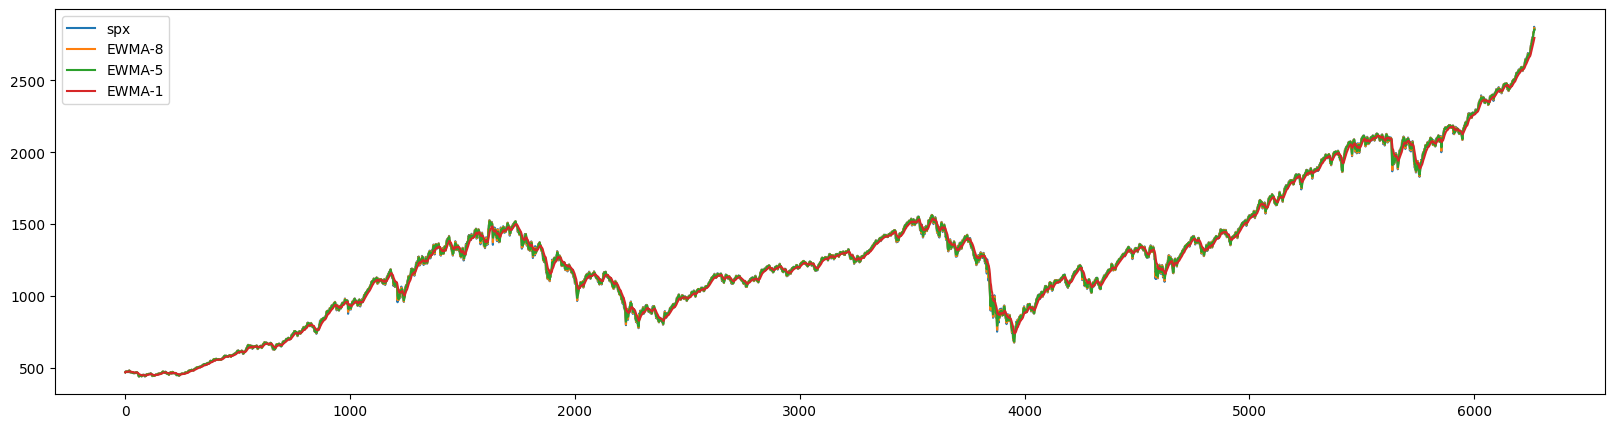

In [22]:
df_sma[['spx','EWMA-8','EWMA-5','EWMA-1']].plot(figsize=(20,5))

## Prophet

In [30]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)  # SE CONVIERTE LA COLUMNA DATE A TIPO DATETIME

In [31]:
df_prop = pd.DataFrame()
df_prop['ds'] = df_comp['date']
df_prop['y'] = df_comp['spx']

model = Prophet()
model.fit(df_prop)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bawf420/n62iu1cr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bawf420/84qafaqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40762', 'data', 'file=/tmp/tmp1bawf420/n62iu1cr.json', 'init=/tmp/tmp1bawf420/84qafaqn.json', 'output', 'file=/tmp/tmp1bawf420/prophet_modelevteoi4x/prophet_model-20250321005234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
future = model.make_future_dataframe(periods=50, freq = 'm')
future.tail()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
6314,2021-10-31
6315,2021-11-30
6316,2021-12-31
6317,2022-01-31
6318,2022-02-28


In [42]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6314,2021-10-31,3230.013093,2165.941818,4204.608784,2182.848889,4205.177600,-2.693313,-2.693313,-2.693313,12.429229,12.429229,12.429229,-15.122542,-15.122542,-15.122542,0.0,0.0,0.0,3227.319780
6315,2021-11-30,3245.410687,2157.194295,4264.816326,2167.170531,4247.252911,-8.651340,-8.651340,-8.651340,-5.025827,-5.025827,-5.025827,-3.625513,-3.625513,-3.625513,0.0,0.0,0.0,3236.759346
6316,2021-12-31,3261.321533,2157.148454,4303.386480,2156.016061,4297.438244,2.795574,2.795574,2.795574,-4.724175,-4.724175,-4.724175,7.519750,7.519750,7.519750,0.0,0.0,0.0,3264.117107
6317,2022-01-31,3277.232379,2122.406928,4351.012594,2144.837675,4355.971973,-12.179176,-12.179176,-12.179176,-5.415388,-5.415388,-5.415388,-6.763788,-6.763788,-6.763788,0.0,0.0,0.0,3265.053203
6318,2022-02-28,3291.603466,2111.795587,4413.142893,2118.202686,4394.522675,-12.062743,-12.062743,-12.062743,-5.415388,-5.415388,-5.415388,-6.647355,-6.647355,-6.647355,0.0,0.0,0.0,3279.540723


In [43]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6314,2021-10-31,3227.319780,2165.941818,4204.608784
6315,2021-11-30,3236.759346,2157.194295,4264.816326
6316,2021-12-31,3264.117107,2157.148454,4303.386480
6317,2022-01-31,3265.053203,2122.406928,4351.012594
6318,2022-02-28,3279.540723,2111.795587,4413.142893


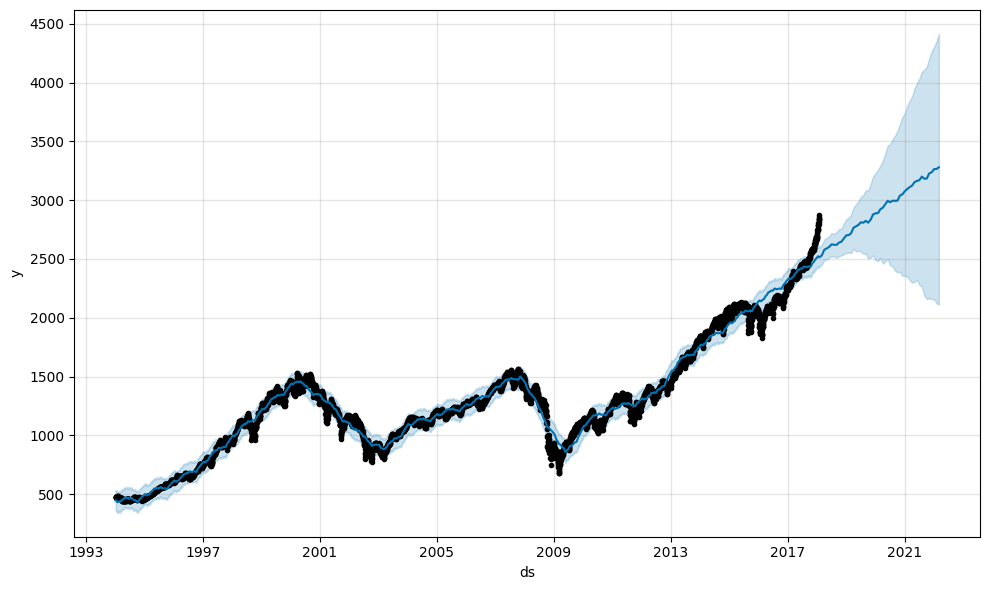

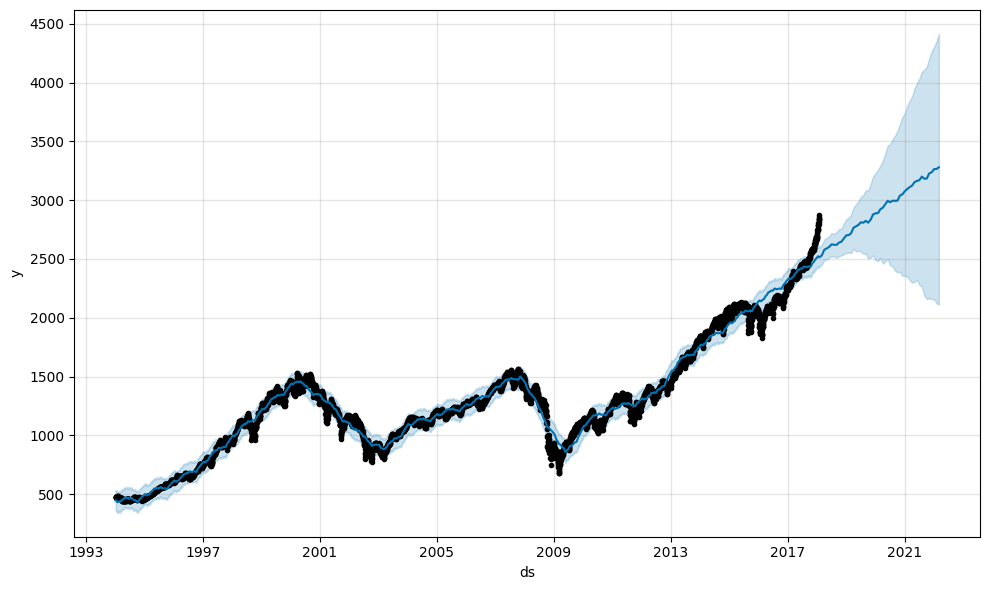

In [44]:
# grafica del resultado de la predicción
model.plot(forecast)